In [23]:
from warnings import filterwarnings
filterwarnings('ignore')
import pandas as pd
import numpy as np
import scipy
import scipy.stats as stats
import statsmodels
import matplotlib.pyplot as plt
import seaborn as sns

# Load and Describe Datasets

In [24]:
# Load data
raw_data = pd.read_csv('/content/sba_loans.zip')
meta_data = pd.read_csv('/content/data_description.csv')
meta_data.head(meta_data.shape[0])

,Variable name,Data type,Description of variable
0,LoanNr_ChkDgt,Text,Identifier – Primary key
1,Name,Text,Borrower name
2,City,Text,Borrower city
3,State,Text,Borrower state
4,Zip,Text,Borrower zip code
5,Bank,Text,Bank name
6,BankState,Text,Bank state
7,NAICS,Text,North American industry classification system ...
8,ApprovalDate,Date/Time,Date SBA commitment issued
9,ApprovalFY,Text,Fiscal year of commitment


In [25]:
# Check inconsistencies with meta data
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 809247 entries, 0 to 809246
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   City               809222 non-null  object 
 1   State              809235 non-null  object 
 2   Zip                809247 non-null  int64  
 3   Bank               807842 non-null  object 
 4   BankState          807836 non-null  object 
 5   NAICS              809247 non-null  int64  
 6   Term               809247 non-null  int64  
 7   NoEmp              809247 non-null  int64  
 8   NewExist           809119 non-null  float64
 9   CreateJob          809247 non-null  int64  
 10  RetainedJob        809247 non-null  int64  
 11  FranchiseCode      809247 non-null  int64  
 12  UrbanRural         809247 non-null  int64  
 13  RevLineCr          805153 non-null  object 
 14  LowDoc             806928 non-null  object 
 15  DisbursementGross  809247 non-null  object 
 16  Ba

In [26]:
# Count missing values
print('Missing Value % by columns:\t')
100*raw_data.isna().sum()/raw_data.shape[0]

Missing Value % by columns:	


City                 0.003089
State                0.001483
Zip                  0.000000
Bank                 0.173618
BankState            0.174360
NAICS                0.000000
Term                 0.000000
NoEmp                0.000000
NewExist             0.015817
CreateJob            0.000000
RetainedJob          0.000000
FranchiseCode        0.000000
UrbanRural           0.000000
RevLineCr            0.505902
LowDoc               0.286563
DisbursementGross    0.000000
BalanceGross         0.000000
GrAppv               0.000000
SBA_Appv             0.000000
MIS_Status           0.225148
dtype: float64

In [27]:
# Describe categorical columns
raw_data.describe(include = 'object')

,City,State,Bank,BankState,RevLineCr,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,MIS_Status
count,809222,809235,807842,807836,805153,806928,809247,809247,809247,809247,807425
unique,31320,51,5716,55,16,8,110579,13,20724,35896,2
top,LOS ANGELES,CA,BANK OF AMERICA NATL ASSOC,CA,N,N,"$50,000.00",$0.00,"$50,000.00","$25,000.00",P I F
freq,10372,117341,78111,106293,378424,704515,39328,809235,62264,44418,665576


In [28]:
# Describe numerical columns
raw_data.describe()

,Zip,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural
count,809247.000000,809247.000000,809247.000000,809247.000000,809119.000000,809247.000000,809247.000000,809247.000000,809247.000000
mean,53800.937004,398573.783610,110.798776,11.414084,1.280276,8.415866,10.773366,2751.939176,0.757748
std,31186.367109,263354.979813,78.872428,74.529429,0.451692,236.288348,236.612053,12758.411810,0.646347
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27577.000000,235210.000000,60.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,55411.000000,445310.000000,84.000000,4.000000,1.000000,0.000000,1.000000,1.000000,1.000000
75%,83704.000000,561730.000000,120.000000,10.000000,2.000000,1.000000,4.000000,1.000000,1.000000
max,99999.000000,928120.000000,569.000000,9999.000000,2.000000,8800.000000,9500.000000,99999.000000,2.000000


# Cleaning steps

* Remove '$' and ',' characters from dollar amount of currency columns and convert them to float type.
* Ensure binary columns 'LowDoc' and 'RevLineCr' have only 'Y', 'N', or 'Missing' values.
* Clean the 'FranchiseCode' column:  value of 0 or 1 means missing franchise code.

* Clean the 'NAICS' column (industry code) by ensuring it contains only 6-digit codes or 0 for undefined values (industry code can only be 6 digit values).

* Convert the following columns (they do not represent any measurement) to object type: 'FranchiseCode', 'NAICS', 'Zip', 'NewExist', 'UrbanRural'.
* Clean the 'MIS_Status' column by dropping missing values and mapping its values to binary values 0 and 1.

* Fill missing values in the DataFrame with 'Missing' for object columns and drop rows with missing numeric values (it is less than 1 percent of the dataset).

In [29]:
def clean_data(data):
    """
    Apply a series of cleaning functions to the input DataFrame.
    
    Input:
        data: The raw DataFrame to be cleaned.

    Output:
        The cleaned DataFrame.
    """
    def clean_currency_columns(data):
        """
        Remove '$' and ',' characters from dollar amount columns and convert them to float type.
        """
        for col in ['DisbursementGross', 'BalanceGross', 'GrAppv', 'SBA_Appv']:
            for char in ['$', ',']:
                data[col] = data[col].str.replace(char, '')
            data[col] = data[col].astype(float)
        return data

    def clean_binary_columns(data):
        """
        Ensure binary columns 'LowDoc' and 'RevLineCr' have only 'Y', 'N', or 'Missing' values.
        """
        for col in ['LowDoc', 'RevLineCr']:
            data[col] = data[col].apply(lambda x: 'Missing' if (x not in ['N', 'Y']) or (x == np.NaN) else x)
        return data

    def clean_franchise_code_column(data):
        """
        Clean the 'FranchiseCode' column by converting to 'object' type and replacing 0 and 1 is replaced with 'missing'.
        """
        data['FranchiseCode'] = data['FranchiseCode'].astype('str')
        data['FranchiseCode'] = data['FranchiseCode'].apply(lambda x: 'Missing' if (x in ['0', '1']) or (x == np.NaN) else x)
        return data

    def clean_urban_rural_columns(data):
        """
        Clean the 'UrbanRural' column: 1 = Urban, 2 = rural, 0 = undefined 
        """
        def clean(val):
          if val == 1: return 'Urban'
          elif val == 2: return 'Rural'
          else: return 'Missing'
        data['UrbanRural'] = data['UrbanRural'].apply(clean)
        return data
        
    def clean_newexist_columns(data):
        """
        Clean the 'NewExist' column:  1 = Existing business, 2 = New business
        """
        def clean(val):
          if val == 1: return 'Existing'
          elif val == 2: return 'New'
          else: return 'Missing'
        data['NewExist'] = data['NewExist'].apply(clean)
        return data

    def clean_naics_column(data):
        """
        Clean the 'NAICS' column by ensuring it contains only 6-digit codes or 'Missing' for undefined values.
        """
        data['NAICS'] = data['NAICS'].astype('str')
        data['NAICS'] = data['NAICS'].apply(lambda x: x if len(x) == 6 else 'Missing')
        return data

    def clean_mis_status_column(data):
        """
        Clean the 'MIS_Status' column by filling missing values with 0 and mapping values to binary 0 and 1.
        """
        data['MIS_Status'] = data['MIS_Status'].fillna(value = 'P I F')
        MIS_dict = {'P I F': 0, 'CHGOFF': 1}
        data['MIS_Status'].replace(MIS_dict, inplace=True)
        return data

    def fill_missing_values(data):
        """
        Fill missing values in the DataFrame with 'Missing' for object columns 0 for numeric columns.
        """
        for col in data.columns:
          if data[col].dtype == 'object':
              data[col] = data[col].fillna(value = 'Missing')
          else:
              data[col] = data[col].fillna(0)
        return data
    data = clean_currency_columns(data)
    data = clean_binary_columns(data)
    data = clean_franchise_code_column(data)
    data = clean_newexist_columns(data)
    data = clean_urban_rural_columns(data)
    data = clean_naics_column(data)
    data = clean_mis_status_column(data)
    data = fill_missing_values(data)
    return data

In [30]:
# Apply the functions to clean the data
data = clean_data(raw_data)

# Pring first 3 rows of cleaned dataset
data.head(3)

,City,State,Zip,Bank,BankState,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,MIS_Status
0,GLEN BURNIE,MD,21060,"BUSINESS FINANCE GROUP, INC.",VA,811111,240,7,Existing,6,7,Missing,Urban,Missing,N,743000.0,0.0,743000.0,743000.0,0
1,WEST BEND,WI,53095,JPMORGAN CHASE BANK NATL ASSOC,IL,722410,240,20,Existing,0,0,Missing,Missing,N,N,137000.0,0.0,137000.0,109737.0,0
2,SAN DIEGO,CA,92128,UMPQUA BANK,OR,Missing,120,2,Existing,0,0,Missing,Missing,Missing,N,280000.0,0.0,280000.0,210000.0,0


In [31]:
# Describe non-numeric columns of the cleaned data
data.describe(include = 'object')

,City,State,Bank,BankState,NAICS,NewExist,FranchiseCode,UrbanRural,RevLineCr,LowDoc
count,809247,809247,809247,809247,809247,809247,809247,809247,809247,809247
unique,31321,52,5717,56,1307,3,2683,3,3,3
top,LOS ANGELES,CA,BANK OF AMERICA NATL ASSOC,CA,Missing,Existing,Missing,Urban,N,N
freq,10372,117341,78111,106293,181845,580478,762692,423681,378424,704515


# Feature Engineering

1. Industry: Use NAICs (industry codes) to find Industry.
2.  SBA_portion: Proportion of gross amount guaranteed by SBA.
3. Same_State: Is the bank state and business state same?
4. monthly_amount: GrAppv/Term
5. Binned numeric columns (Optional): Create a small number bins for numerical variables based on quantiles.



In [32]:
# Load industry codes
industry_codes = pd.read_csv('/content/naics_industry_codes.csv')
industry_codes

,Sector,Description
0,11,"Agriculture, forestry, fishing and hunting"
1,21,"Mining, quarrying, and oil and gas extraction"
2,22,Utilities
3,23,Construction
4,31–33,Manufacturing
5,42,Wholesale trade
6,44–45,Retail trade
7,48–49,Transportation and warehousing
8,51,Information
9,52,Finance and insurance


In [33]:
# Define industry code map
industry_map = {}
for (val, industry) in industry_codes.values:
    if len(val)>2:
      start, end = int(val[:2]), int(val[-2:])
      for code in range(start,end+1):
          industry_map[str(code)] = industry
    else:
      industry_map[val] = industry
industry_map

{'11': 'Agriculture, forestry, fishing and hunting',
 '21': 'Mining, quarrying, and oil and gas extraction',
 '22': 'Utilities',
 '23': 'Construction',
 '31': 'Manufacturing',
 '32': 'Manufacturing',
 '33': 'Manufacturing',
 '42': 'Wholesale trade',
 '44': 'Retail trade',
 '45': 'Retail trade',
 '48': 'Transportation and warehousing',
 '49': 'Transportation and warehousing',
 '51': 'Information',
 '52': 'Finance and insurance',
 '53': 'Real estate and rental and leasing',
 '54': 'Professional, scientific, and technical services',
 '55': 'Management of companies and enterprises',
 '56': 'Administrative and support and waste management and remediation services',
 '61': 'Educational services',
 '62': 'Health care and social assistance',
 '71': 'Arts, entertainment, and recreation',
 '72': 'Accommodation and food services',
 '81': 'Other services (except public administration)',
 '92': 'Public administration'}

In [34]:
# Create 'Industry' column
data['Industry'] = data['NAICS'].apply(lambda x: industry_map.get(x[:2], 'Missing'))
data['Industry'].value_counts()

Missing                                                                     181845
Retail trade                                                                114627
Other services (except public administration)                                65409
Professional, scientific, and technical services                             61351
Manufacturing                                                                61269
Accommodation and food services                                              60828
Construction                                                                 59975
Health care and social assistance                                            49697
Wholesale trade                                                              43844
Administrative and support and waste management and remediation services     29334
Transportation and warehousing                                               20256
Arts, entertainment, and recreation                                          13186
Real

In [58]:
# Create SBA_portion column: Proportion of gross amount guaranteed by SBA.
data['SBA_portion'] = data['SBA_Appv']/data['GrAppv']
data.groupby('MIS_Status')['SBA_portion'].agg(['count','mean', 'std'])

,count,mean,std
MIS_Status,,,
0,667398,0.723400,0.172699
1,141849,0.644377,0.163598


In [36]:
# Create Same_State column: Is the bank state and business state same?
data['SameState'] = (data['BankState']==data['State']).astype('int')
data.groupby('SameState')['MIS_Status'].agg(['count','mean', 'std'])

,count,mean,std
SameState,,,
0,382518,0.253614,0.435080
1,426729,0.105071,0.306646


In [37]:
# Create monthly_amount column: GrAppv/Term
data['MonthlyAmount'] = data['GrAppv']/(data['Term']+(data['Term']==0).astype('int')) # avoid division by 0
data.groupby('MIS_Status')['MonthlyAmount'].agg(['mean', 'std'])

,mean,std
MIS_Status,,
0,2333.459908,9663.541137
1,4157.597622,18325.312632


In [38]:
# Create a function for binning selected numerical columns
numerical_cols = ['NoEmp', 'CreateJob', 'RetainedJob', 'DisbursementGross', 'BalanceGross', 'GrAppv', 'SBA_Appv']
def bin_numerical_cols(data, numerical_cols, drop=True, number_of_bins=5):
    '''
    Create bins for numerical variables based on quantiles
    
    Inputs:
        data:  Cleaned and feature engineered SBA dataframe
        drop:  True or False/ True drops binned numerical columns
        number_of_bins: Maximum number of quantile bins
    
    Output: Dataframe with bin columns
    '''
    #This can also be done with if condition to determine numerical columns
    bin_columns = []
    binned_col = []
    bins_for_cols = {}
    for col in numerical_cols:
        bins = [np.percentile(data[col].values, i) for i in np.linspace(2.5,97.5, number_of_bins - 1)]
        bins = np.concatenate([[-np.inf], bins, [np.inf]])
        bins_for_cols[col] = bins
        data[col + '_bin'] = pd.cut(data[col], bins, duplicates='drop')
        data[col + '_bin'] = pd.cut(data[col], bins, duplicates='drop').astype('object')
        binned_col.append(col)
        bin_columns.append(col + '_bin')
    if drop==True:
        data.drop(columns = binned_col, inplace=True)
    return data, bin_columns, bins_for_cols

In [39]:
# Apply bin function
data, bin_columns, bins_for_cols = bin_numerical_cols(data, numerical_cols, drop=False, number_of_bins=5)
data[bin_columns].describe()

,NoEmp_bin,CreateJob_bin,RetainedJob_bin,DisbursementGross_bin,BalanceGross_bin,GrAppv_bin,SBA_Appv_bin
count,809247,809247,809247,809247,809247,809247,809247
unique,5,3,4,5,2,5,5
top,"(7.0, 60.0]","(-inf, 0.0]","(-inf, 0.0]","(8138.0, 55000.0]","(-inf, 0.0]","(7000.0, 50000.0]","(4250.0, 29750.0]"
freq,250108,566148,396287,258985,809235,293667,256869


# Data Exploration

Label: MIS_Status - default or not

In [40]:
# Define Label
label = 'MIS_Status'

In [17]:
# View independent features of the dataset
ind_columns = data.drop(columns = ['MIS_Status']).columns
ind_columns

Index(['City', 'State', 'Zip', 'Bank', 'BankState', 'NAICS', 'Term', 'NoEmp',
       'NewExist', 'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural',
       'RevLineCr', 'LowDoc', 'DisbursementGross', 'BalanceGross', 'GrAppv',
       'SBA_Appv', 'Industry', 'SBA_portion', 'SameState', 'MonthlyAmount',
       'NoEmp_bin', 'CreateJob_bin', 'RetainedJob_bin',
       'DisbursementGross_bin', 'BalanceGross_bin', 'GrAppv_bin',
       'SBA_Appv_bin'],
      dtype='object')

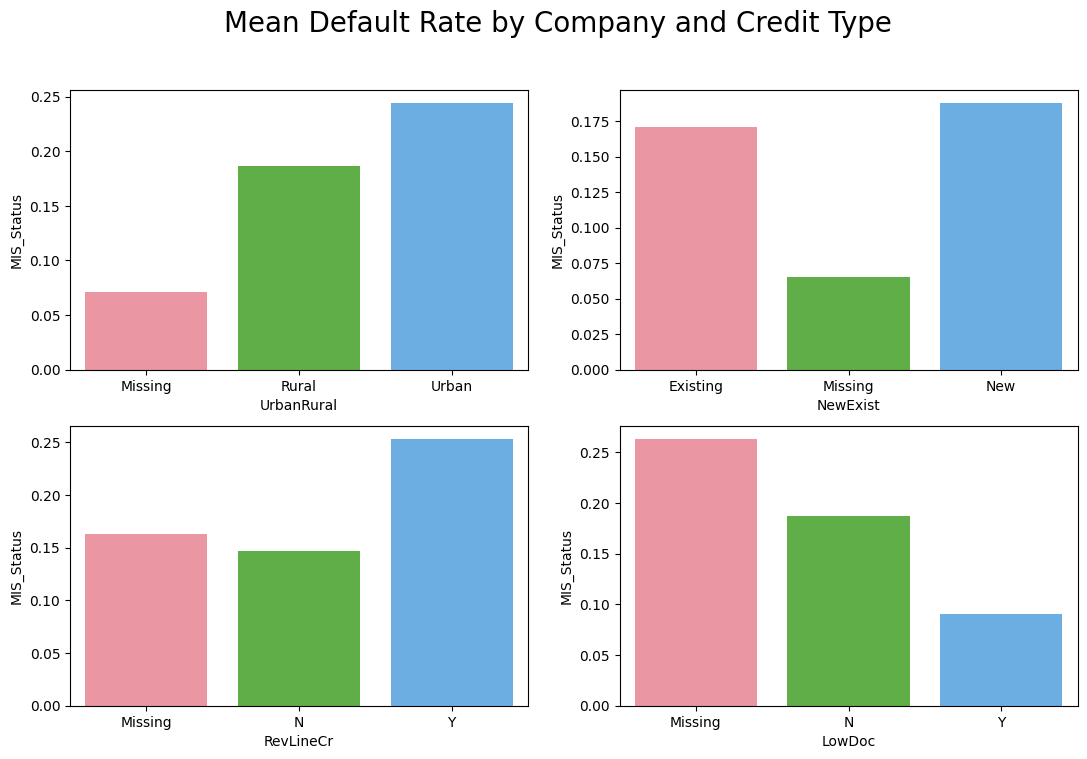

In [18]:
# Effect of 'UrbanRural', 'RevLineCr', 'LowDoc', 'NewExist'
plt.figure(figsize = (13,8))
sns.set_palette(sns.color_palette(palette='colorblind', n_colors=2, desat=None, as_cmap=False))
for i, col in enumerate(['UrbanRural', 'NewExist', 'RevLineCr', 'LowDoc']):
    plt.subplot(2,2,i+1)
    subset = data.groupby(col)[label].mean().reset_index()
    sns.barplot(x = subset[col], y = subset[label])
plt.suptitle('Mean Default Rate by Company and Credit Type', fontsize = 20)
plt.savefig('company_type.jpg')
plt.show()

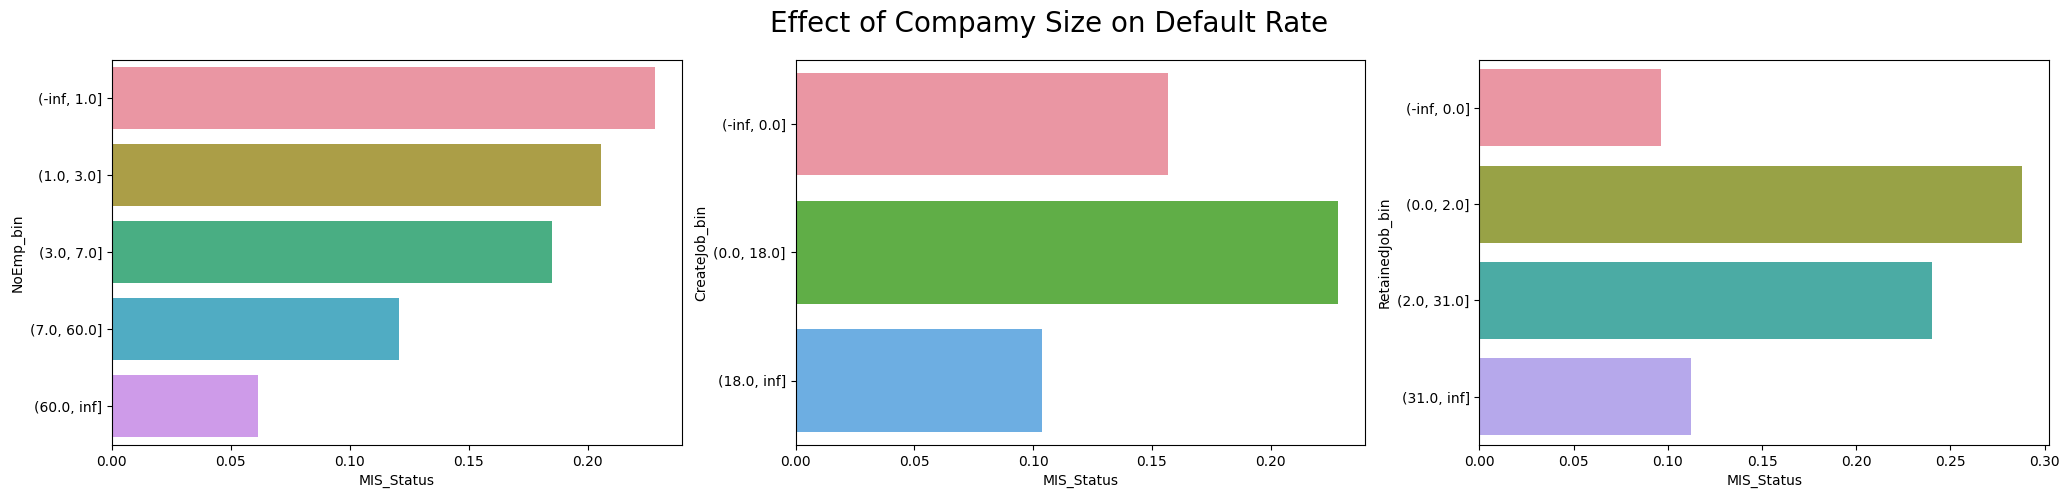

In [22]:
# Company Size (in terms of #employee stat) Effect: 'NoEmp_bin', 'CreateJob_bin', 'RetainedJob_bin'
plt.figure(figsize = (25,5))
for i, col in enumerate(['NoEmp_bin', 'CreateJob_bin', 'RetainedJob_bin']):
    plt.subplot(1,3,i+1)
    subset = data.groupby(col)[label].mean().reset_index()
    sns.barplot(y = subset[col], x = subset[label])
plt.suptitle('Effect of Compamy Size on Default Rate', fontsize = 20)
plt.savefig('company_size.jpg')
plt.show()

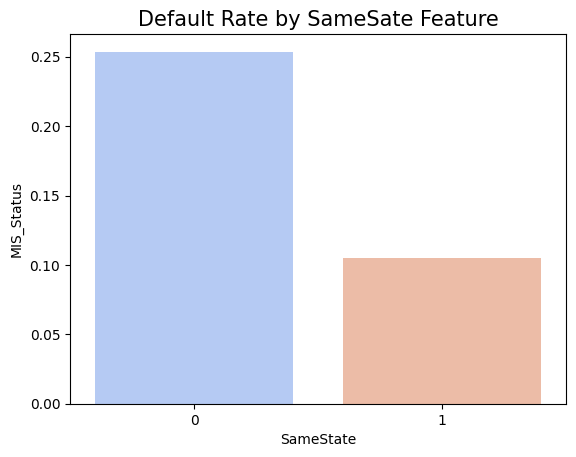

In [21]:
# Plot boxplot of label column by SameSate
subset = data.groupby('SameState')[label].mean().reset_index()
sns.barplot(data = subset, x = 'SameState', y = label, palette = 'coolwarm')
plt.title('Default Rate by SameSate Feature', fontsize = 15)
plt.savefig('samestate.jpg')
plt.show()

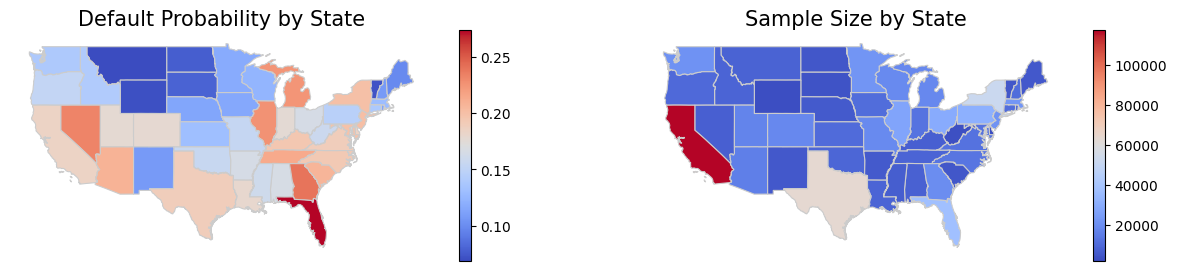

In [ ]:
# !pip install geopandas
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# Load the d US states polygon shape dataset
us_states = gpd.read_file("/content/states_polygon.zip")[['STATE_NAME', 'geometry']]

# Create a grouped DataFrame by state names to find mean and count of default column (label column)
grouped = data[['State', label]].groupby('State')[label].agg(['mean', 'count']).reset_index()
grouped = grouped[~grouped.State.isin(['Missing','AK','HI'])]

# Convert State codes to State Names
state_codes_to_names = {
    'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California',
    'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia',
    'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa',
    'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland',
    'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi', 'MO': 'Missouri',
    'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey',
    'NM': 'New Mexico', 'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio',
    'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina',
    'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont',
    'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming'
}
grouped['State'] = grouped['State'].map(state_codes_to_names)

# Plot the heatmap
fig, axes = plt.subplots(ncols = 2, figsize=(15,10))

# Merge grouped data with state-shape data and Plot aggregated value
us_states_merged = us_states.merge(grouped[['State','mean']], left_on='STATE_NAME', right_on='State')
us_states_merged.plot(column='mean', cmap='coolwarm', linewidth=0.8, ax=axes[0], edgecolor='0.8', legend=True, legend_kwds={'shrink': 0.3})
axes[0].set_title("Default Probability by State", fontsize=15)
axes[0].set_axis_off()

us_states_merged = us_states.merge(grouped[['State','count']], left_on='STATE_NAME', right_on='State')
us_states_merged.plot(column='count', cmap='coolwarm', linewidth=0.8, ax=axes[1], edgecolor='0.8', legend=True, legend_kwds={'shrink': 0.3})
axes[1].set_title("Sample Size by State", fontsize=15)
axes[1].set_axis_off()

plt.show()

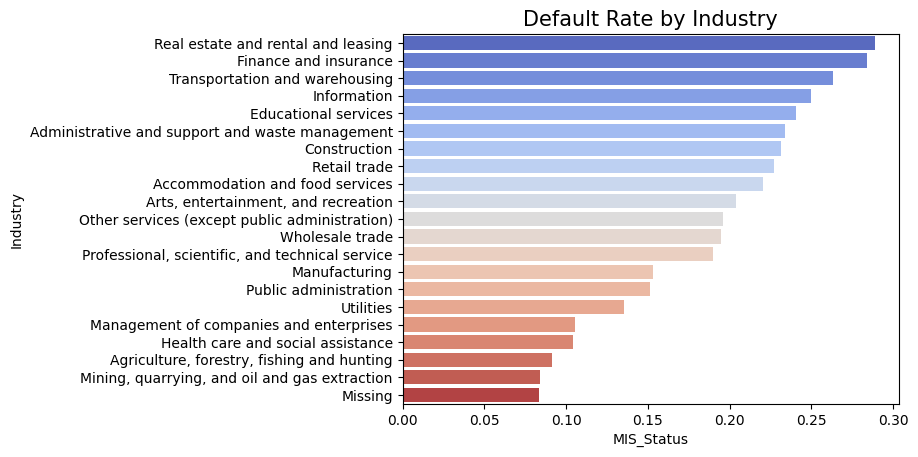

In [420]:
# Default Rate by Industry
subset = data.groupby('Industry')[label].mean().reset_index().sort_values(label, ascending = False)
sns.barplot(y = subset['Industry'].str[:47], x = subset[label], palette = 'coolwarm')
plt.title('Default Rate by Industry', fontsize = 15)
plt.show()

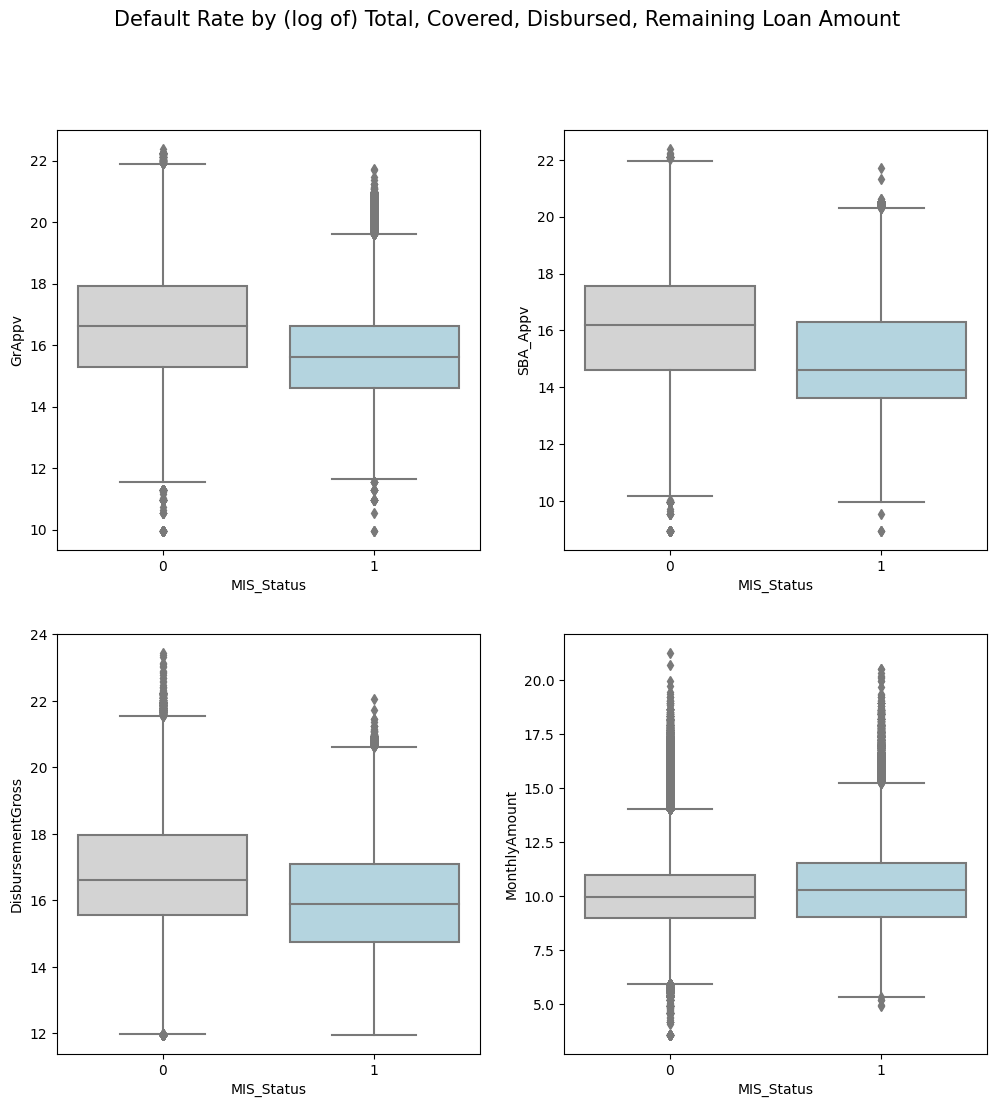

In [ ]:
# Currency Features
plt.figure(figsize = (12,12))
for i, col in enumerate(['GrAppv','SBA_Appv', 'DisbursementGross', 'MonthlyAmount']):
  plt.subplot(2,2,i+1)
  sns.boxplot(y = data[col].apply(np.log2), x = data[label], palette = sns.color_palette(['lightgray', 'lightblue']))
plt.suptitle('Default Rate by (log of) Total, Covered, Disbursed, Remaining Loan Amount', fontsize = 15)
plt.show()

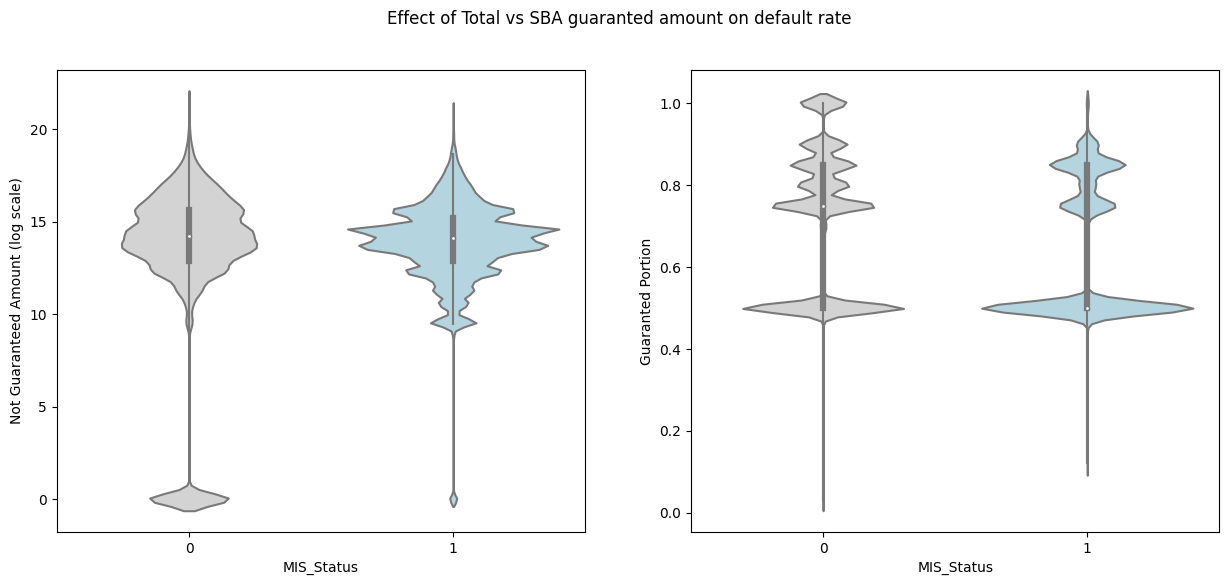

In [ ]:
# Plot effect of Total vs SBA guaranted amount on default rate
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
sns.violinplot(y = (data['GrAppv'] - data['SBA_Appv']+1).apply(np.log2), x = data[label], palette = sns.color_palette(['lightgray', 'lightblue']))
plt.ylabel('Not Guaranteed Amount (log scale)')
plt.subplot(1,2,2)
sns.violinplot(y = (data['SBA_Appv']/data['GrAppv']), x = data[label], palette = sns.color_palette(['lightgray', 'lightblue']))
plt.ylabel('Guaranted Portion')
plt.suptitle('Effect of Total vs SBA guaranted amount on default rate')
plt.show()

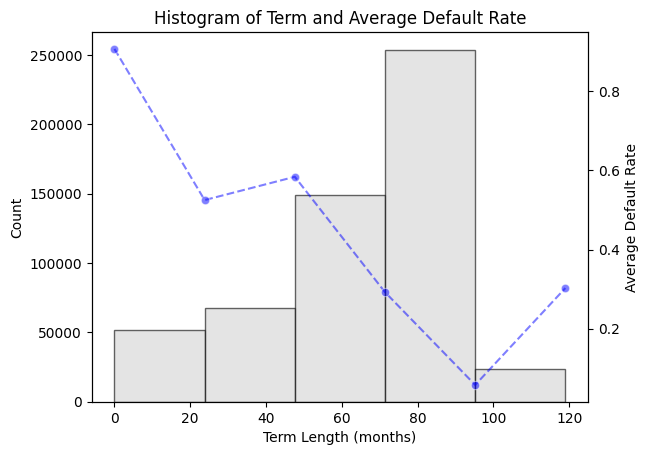

In [19]:
# Filter out loans with more than 10 year duration and create bins/categories for the term length (binsize = 24 month)
max_term = 120  
n_bins = 6 

# Define custom bins using numpy.histogram()
bins = np.linspace(data[data.Term<max_term]['Term'].min(), data[data.Term<120]['Term'].max(), n_bins)
hist, edges = np.histogram(data[data.Term<max_term]['Term'], bins=bins)


# Calculate average default rate for each bin
subset_data = data[data.Term<max_term][['Term', label]]
subset_data['Term'] = subset_data['Term'].apply(lambda x: edges[np.where((x<=edges)==True)[0][0]])
default_rate = subset_data.groupby('Term')[label].mean().reset_index()

# Create a bar plot for the histogram
plt.bar(edges[:-1], hist, width = np.diff(edges), edgecolor='black', align='edge', color='lightgray', alpha=0.6)
plt.xlabel('Term Length (months)')
plt.ylabel('Count')

# Create a secondary y-axis for the line plot
plt.twinx()

# Create a line plot using sns.lineplot() for the average default rate
sns.lineplot(data=default_rate, x='Term', y=label, marker='o', color='blue', linestyle = '--', alpha = 0.5)

# Set axis labels and title
plt.xlabel('Term')
plt.ylabel('Average Default Rate')
plt.title('Histogram of Term and Average Default Rate')

# Show the plot
plt.savefig('term.jpg')
plt.show()

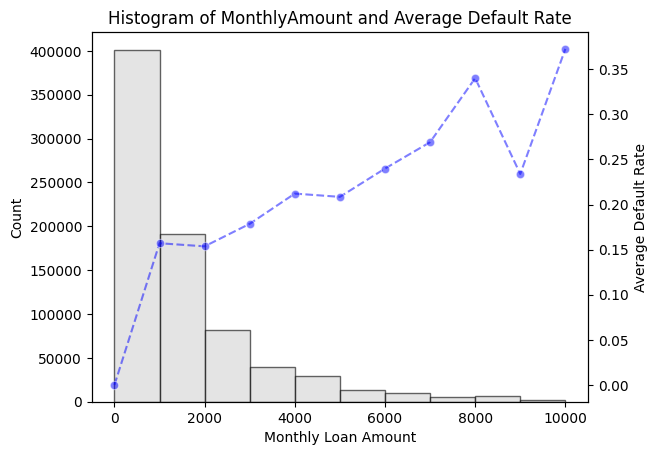

In [20]:
# Filter out loans with more than 10 year duration
max_val = 10000 
n_bins = 11
col = 'MonthlyAmount'

# Define custom bins using numpy.histogram()
bins = np.linspace(data[data[col]<max_val][col].min(), data[data[col]<max_val][col].max(), n_bins)
hist, edges = np.histogram(data[data[col]<max_val][col], bins=bins)

# Calculate average default rate for each bin
subset_data = data[data[col]<max_val][[col, label]]
subset_data[col] = subset_data[col].apply(lambda x: edges[np.where((x<=edges)==True)[0][0]])
default_rate = subset_data.groupby(col)[label].mean().reset_index()

# Create a bar plot for the histogram
plt.bar(edges[:-1], hist, width = np.diff(edges), edgecolor='black', align='edge', color='lightgray', alpha=0.6)
plt.xlabel('Monthly Loan Amount')
plt.ylabel('Count')

# Create a secondary y-axis for the line plot
plt.twinx()

# Create a line plot using sns.lineplot() for the average default rate
sns.lineplot(data=default_rate, x=col, y=label, marker='o', color='blue', linestyle = '--', alpha = 0.5)

# Set axis labels and title
plt.ylabel('Average Default Rate')
plt.title(f'Histogram of {col} and Average Default Rate')

# Show the plot
plt.savefig('monthly_amount.jpg')
plt.show()


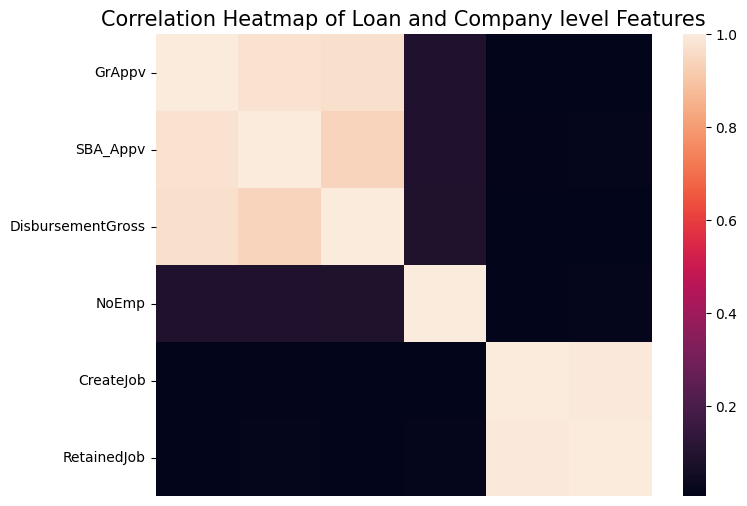

In [422]:
plt.figure(figsize = (8,6))
ax = sns.heatmap(data[['GrAppv','SBA_Appv', 'DisbursementGross', 'NoEmp','CreateJob', 'RetainedJob']].corr())
plt.title('Correlation Heatmap of Loan and Company level Features', fontsize = 15)
ax.set_xticks([])
plt.show()

In [423]:
data[['GrAppv','SBA_Appv', 'DisbursementGross', 'NoEmp','CreateJob', 'RetainedJob']].corr()

,GrAppv,SBA_Appv,DisbursementGross,NoEmp,CreateJob,RetainedJob
GrAppv,1.000000,0.974468,0.970820,0.090152,0.008402,0.010844
SBA_Appv,0.974468,1.000000,0.939815,0.092355,0.013967,0.014991
DisbursementGross,0.970820,0.939815,1.000000,0.088322,0.007192,0.010448
NoEmp,0.090152,0.092355,0.088322,1.000000,0.008873,0.015509
CreateJob,0.008402,0.013967,0.007192,0.008873,1.000000,0.994071
RetainedJob,0.010844,0.014991,0.010448,0.015509,0.994071,1.000000


# Hypothesis Tests

In [ ]:
# Seperate data into two groups using label column
col = 'MonthlyAmount'
group1 = data[data[label]==1][col].values # Default Group
group2 = data[data[label]==0][col].values # Not Default Group

# Levene's test for variances
levene_statistic, p_value_levene = stats.levene(group1, group2)

print("Levene's statistic:", levene_statistic)
print("P-value for variances (Levene's test):", p_value_levene)

Levene's statistic: 2704.4475518928025
P-value for variances (Levene's test): 0.0


This indicates that there is strong evidence against the null hypothesis of equal variances between the groups. Therefore, we should not use the standard t-test or one-way ANOVA in this situation, as they assume equal variances. Instead, we should use Welch's t-test (for comparing means of two groups) or Welch's ANOVA (for comparing means of multiple groups), as they do not rely on the assumption of equal variances.

In [ ]:
# Calculate p-value for a one-sided t-test (checking if group1 mean > group2 mean: MonthlyAmount is greater for Default group)
t_statistic, p_value_two_tailed = stats.ttest_ind(group1, group2, equal_var=False)
if t_statistic > 0:
    p_value_one_tailed = p_value_two_tailed / 2
else:
    p_value_one_tailed = 1 - p_value_two_tailed / 2

print("One-sided Welch's t-test")
print("T-statistic:", t_statistic)
print("P-value for one-sided test (A mean > B mean):", p_value_one_tailed)

One-sided Welch's t-test
T-statistic: 36.320812458383124
P-value for one-sided test (A mean > B mean): 5.7875154330986775e-288


In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

for groups in ['UrbanRural', 'RevLineCr', 'LowDoc', 'NewExist']:
  print(f'------------------{groups}-----------------')
  # Perform one-way ANOVA
  anova_lm = sm.stats.anova_lm(ols(f"{label} ~ C({groups})", data=data).fit(), typ=2)
  print(anova_lm, '\n\n')

  # Perform the Tukey HSD test
  tukey = pairwise_tukeyhsd(data[label], data[groups], alpha=0.05)
  print(tukey.summary(),'\n\n')

print

------------------UrbanRural-----------------
                      sum_sq        df             F  PR(>F)
C(UrbanRural)    5183.879812       2.0  18728.261239     0.0
Residual       111744.986676  807422.0           NaN     NaN 


Multiple Comparison of Means - Tukey HSD, FWER=0.05
 group1 group2 meandiff p-adj lower  upper  reject
--------------------------------------------------
Missing  Rural   0.1159   0.0 0.1126 0.1191   True
Missing  Urban   0.1733   0.0 0.1712 0.1754   True
  Rural  Urban   0.0574   0.0 0.0543 0.0606   True
-------------------------------------------------- 


------------------RevLineCr-----------------
                     sum_sq        df            F  PR(>F)
C(RevLineCr)    1464.143652       2.0  5119.233678     0.0
Residual      115464.722836  807422.0          NaN     NaN 


Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1 group2 meandiff p-adj  lower   upper  reject
----------------------------------------------------
Missing      N  -0.0162

In [ ]:
import statsmodels.formula.api as smf

# Create dummy variables for the categorical predictors
dummy_variables = []
for col in ['UrbanRural', 'RevLineCr', 'LowDoc', 'NewExist']:
    dummy_variables.append(pd.get_dummies(data[col], prefix = col, drop_first=True))

# Create a new DataFrame with the response variable and the dummy variables
dummy_variables.append(data[[label,'Term', 'MonthlyAmount','NoEmp','SameState', 'SBA_Appv', 'SBA_portion']])
data_with_dummies = pd.concat(dummy_variables, axis=1)
data_with_dummies['SBA_Appv'] = data_with_dummies['SBA_Appv'].apply(np.log2)
data_with_dummies['Term'] = data_with_dummies['Term']**0.5
data_with_dummies['NoEmp'] = data_with_dummies['NoEmp']


# Define the formula for the logistic regression model
formula = f"{label} ~ {'+'.join(data_with_dummies.drop(columns = [label]).columns)}"

# Fit the GLM with a logistic link function
glm_logistic = smf.glm(formula, data=data_with_dummies, family=sm.families.Binomial()).fit()

# Print the summary of the model
print(glm_logistic.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             MIS_Status   No. Observations:               807425
Model:                            GLM   Df Residuals:                   807410
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -2.8282e+05
Date:                Mon, 01 May 2023   Deviance:                   5.6561e+05
Time:                        18:15:08   Pearson chi2:                 2.25e+16
No. Iterations:                     8   Pseudo R-squ. (CS):             0.2047
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.3455      0.053  

In [ ]:
# Build a simple model
formula = f"{label} ~ {'+'.join(['Term', 'MonthlyAmount', 'NoEmp', 'SBA_Appv'])}"
simple_logistic = smf.glm(formula, data=data_with_dummies, family=sm.families.Binomial()).fit()

# Perform the likelihood ratio test between the two models
lr_stat = -2 * (simple_logistic.llf - glm_logistic.llf)
p_value = stats.chi2.sf(lr_stat, df=1)  # The degrees of freedom is the difference in the number of parameters

print(f"Likelihood ratio test statistic: {lr_stat}")
print(f"P-value: {p_value}")

Likelihood ratio test statistic: 47722.673273964436
P-value: 0.0


# Predict Default Status

## Feature selection

Select most important features using a combined result of Permutation Feature Importance and Lightgbm Model feature importances.

In [42]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score, roc_auc_score
from sklearn.preprocessing import OneHotEncoder
from copy import deepcopy
from tqdm import tqdm
import lightgbm as lgbm

In [43]:
# Select initial features - remove the ones with very high cardinality
features = list(data.drop(columns = [label, 'Zip', 'City', 'Bank', 'BankState', 'NAICS', 'FranchiseCode', 'BalanceGross']).columns)

# Copy data for building the initial model
copy_data = deepcopy(data[features+[label]])

# split into train and test
train_x, test_x, train_y, test_y = train_test_split(copy_data[features], copy_data[label], test_size = 0.2)
print(train_x.shape, test_x.shape)
copy_data.nunique()

(647397, 23) (161850, 23)


State                        52
Term                        407
NoEmp                       581
NewExist                      3
CreateJob                   234
RetainedJob                 345
UrbanRural                    3
RevLineCr                     3
LowDoc                        3
DisbursementGross        110579
GrAppv                    20724
SBA_Appv                  35896
Industry                     21
SBA_portion               12890
SameState                     2
MonthlyAmount             65578
NoEmp_bin                     5
CreateJob_bin                 3
RetainedJob_bin               4
DisbursementGross_bin         5
BalanceGross_bin              2
GrAppv_bin                    5
SBA_Appv_bin                  5
MIS_Status                    2
dtype: int64

In [44]:
# One-Hot Encoding
encoders = []
encoded_columns = []
for col in train_x.columns:
  if train_x[col].dtype == 'object':
    print(f'Starting encoding for {col}....\n')
    # Create one-hot encoder instance and fit on train data
    encoder = OneHotEncoder(handle_unknown='ignore', sparse = False)
    train_result = encoder.fit(train_x[[col]])

    # Define new column names using encoder categories
    new_cols = [col + '_' + str(name) for name in encoder.categories_[0]]

    # Transform train and test set
    train_x[new_cols] = encoder.transform(train_x[[col]])
    test_x[new_cols] = encoder.transform(test_x[[col]])

    # Append the encoder and encoded columns to the list
    encoders.append(encoder)
    encoded_columns.append(col)

print(f'Encoded Columns: {encoded_columns}')

Starting encoding for State....

Starting encoding for NewExist....

Starting encoding for UrbanRural....

Starting encoding for RevLineCr....

Starting encoding for LowDoc....

Starting encoding for Industry....

Starting encoding for NoEmp_bin....

Starting encoding for CreateJob_bin....

Starting encoding for RetainedJob_bin....

Starting encoding for DisbursementGross_bin....

Starting encoding for BalanceGross_bin....

Starting encoding for GrAppv_bin....

Starting encoding for SBA_Appv_bin....

Encoded Columns: ['State', 'NewExist', 'UrbanRural', 'RevLineCr', 'LowDoc', 'Industry', 'NoEmp_bin', 'CreateJob_bin', 'RetainedJob_bin', 'DisbursementGross_bin', 'BalanceGross_bin', 'GrAppv_bin', 'SBA_Appv_bin']


In [45]:
# Print encoded data shape
select_features = train_x.drop(columns = encoded_columns).columns
train_x.shape, test_x.shape, len(select_features)

((647397, 137), (161850, 137), 124)

### First Round Selection

In [31]:
model = lgbm.LGBMClassifier(learning_rate=0.05,
                                        max_depth=10,
                                        random_state=42,
                                        early_stopping=50,
                                        n_estimators=500
                                    )
model.fit(train_x[select_features].values, train_y,eval_set=[(train_x[select_features].values, train_y),(test_x[select_features].values, test_y)],
          verbose=20, eval_metric='AUC')

[20]	valid_0's auc: 0.951568	valid_0's binary_logloss: 0.258855	valid_1's auc: 0.952168	valid_1's binary_logloss: 0.258181
[40]	valid_0's auc: 0.958719	valid_0's binary_logloss: 0.210231	valid_1's auc: 0.959221	valid_1's binary_logloss: 0.209346
[60]	valid_0's auc: 0.963469	valid_0's binary_logloss: 0.187596	valid_1's auc: 0.963772	valid_1's binary_logloss: 0.186831
[80]	valid_0's auc: 0.965591	valid_0's binary_logloss: 0.178037	valid_1's auc: 0.965741	valid_1's binary_logloss: 0.17746
[100]	valid_0's auc: 0.9672	valid_0's binary_logloss: 0.172508	valid_1's auc: 0.967257	valid_1's binary_logloss: 0.172149
[120]	valid_0's auc: 0.968617	valid_0's binary_logloss: 0.168223	valid_1's auc: 0.968633	valid_1's binary_logloss: 0.16795
[140]	valid_0's auc: 0.969531	valid_0's binary_logloss: 0.16518	valid_1's auc: 0.969495	valid_1's binary_logloss: 0.165043
[160]	valid_0's auc: 0.970337	valid_0's binary_logloss: 0.162637	valid_1's auc: 0.970232	valid_1's binary_logloss: 0.162648
[180]	valid_0's a

LGBMClassifier(early_stopping=50, learning_rate=0.05, max_depth=10,
               n_estimators=500, random_state=42)

In [43]:
# View model performance report
print(classification_report(test_y, model.predict(test_x[select_features])))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97    133157
           1       0.87      0.80      0.83     28328

    accuracy                           0.94    161485
   macro avg       0.91      0.89      0.90    161485
weighted avg       0.94      0.94      0.94    161485



In [38]:
# Calculate model feature importances
model_importance_df = pd.DataFrame(zip(select_features, model.feature_importances_), 
                                   columns = ['Feature', 'Importance'])\
                                   .sort_values(by = 'Importance', ascending = False)
model_importance_df.head(20)

,Feature,Importance
0,Term,4971
7,SBA_portion,1014
9,MonthlyAmount,989
4,DisbursementGross,810
6,SBA_Appv,690
1,NoEmp,469
5,GrAppv,454
70,RevLineCr_Y,386
3,RetainedJob,371
8,SameState,304


In [74]:
# Calculate permutation feature importances
auc_score = roc_auc_score(test_y, model.predict_proba(test_x[select_features])[:,1])
permutation_importances = []
for col in tqdm(select_features):
  x_test_copy = deepcopy(test_x)
  x_test_copy[col] = x_test_copy[col].sample(frac=1).sample(frac=1).values
  new_auc = roc_auc_score(test_y, model.predict_proba(x_test_copy[select_features])[:,1])
  change = auc_score - new_auc
  permutation_importances.append((col, change))

# Create a permutation feature importance dataframe
perm_importance_df = pd.DataFrame(permutation_importances, columns = ['Feature', 'perm_importance']).sort_values('perm_importance', ascending = False)
perm_importance_df.head(20)

,Feature,perm_importance
0,Term,0.378862
7,SBA_portion,0.016509
8,SameState,0.004761
86,Industry_Missing,0.004459
4,DisbursementGross,0.004055
65,UrbanRural_Missing,0.002981
70,RevLineCr_Y,0.002315
5,GrAppv,0.002233
6,SBA_Appv,0.001763
14,State_CA,0.001239


In [91]:
# Combine the top features from the model feature importances and the permutation feature importances 
shortlisted_features = list(set(list(model_importance_df.Feature.values[:30])+\
                                list(perm_importance_df.Feature.values[:30])))
print(f'Shortlisted columns count: {len(shortlisted_features)}')

Shortlisted columns count: 34


### Second Round

In [93]:
import lightgbm as lgbm
model = lgbm.LGBMClassifier(learning_rate=0.05,
                                        max_depth=10,
                                        random_state=42,
                                        early_stopping=50,
                                        n_estimators=500
                                    )
model.fit(train_x[shortlisted_features].values, train_y,
                      eval_set=[(train_x[shortlisted_features].values, train_y),
                                (test_x[shortlisted_features].values, test_y)],
                      verbose=20, 
                      eval_metric='AUC'
                      )

[LightGBM] [Warning] early_stopping_round is set=50, early_stopping=50 will be ignored. Current value: early_stopping_round=50
[20]	valid_0's auc: 0.951448	valid_0's binary_logloss: 0.258846	valid_1's auc: 0.952016	valid_1's binary_logloss: 0.258163
[40]	valid_0's auc: 0.958696	valid_0's binary_logloss: 0.210178	valid_1's auc: 0.959229	valid_1's binary_logloss: 0.209301
[60]	valid_0's auc: 0.963227	valid_0's binary_logloss: 0.187882	valid_1's auc: 0.963508	valid_1's binary_logloss: 0.187191
[80]	valid_0's auc: 0.965508	valid_0's binary_logloss: 0.178284	valid_1's auc: 0.965712	valid_1's binary_logloss: 0.177726
[100]	valid_0's auc: 0.967212	valid_0's binary_logloss: 0.172506	valid_1's auc: 0.967328	valid_1's binary_logloss: 0.172131
[120]	valid_0's auc: 0.968681	valid_0's binary_logloss: 0.168045	valid_1's auc: 0.968693	valid_1's binary_logloss: 0.167834
[140]	valid_0's auc: 0.969693	valid_0's binary_logloss: 0.164726	valid_1's auc: 0.96962	valid_1's binary_logloss: 0.164689
[160]	vali

LGBMClassifier(early_stopping=50, learning_rate=0.05, max_depth=10,
               n_estimators=500, random_state=42)

In [94]:
# View model performance report
print(classification_report(test_y, model.predict(test_x[shortlisted_features])))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97    133157
           1       0.86      0.80      0.83     28328

    accuracy                           0.94    161485
   macro avg       0.91      0.89      0.90    161485
weighted avg       0.94      0.94      0.94    161485



In [ ]:
# Calculate feature importances
model_importance_df = pd.DataFrame(zip(shortlisted_features, model.feature_importances_), 
                                   columns = ['Feature', 'Importance'])\
                                   .sort_values(by = 'Importance', ascending = False)

# Calculate permutation feature importances
auc_score = roc_auc_score(test_y, model.predict_proba(test_x[shortlisted_features])[:,1])
permutation_importances = []
for col in tqdm(shortlisted_features):
  x_test_copy = deepcopy(test_x)
  x_test_copy[col] = x_test_copy[col].sample(frac=1).sample(frac=1).values
  new_auc = roc_auc_score(test_y, model.predict_proba(x_test_copy[shortlisted_features])[:,1])
  change = auc_score - new_auc
  permutation_importances.append((col, change))
perm_importance_df = pd.DataFrame(permutation_importances, columns = ['Feature', 'perm_importance']).sort_values('perm_importance', ascending = False)

# Combine the top features from the model feature importances and the permutation feature importances 
shortlisted_features = list(set(list(model_importance_df.Feature.values[:15])+\
                                list(perm_importance_df.Feature.values[:15])))

In [170]:
print(f'Shortlisted columns count: {len(shortlisted_features)}')
shortlisted_features

Shortlisted columns count: 16


['NoEmp',
 'Industry_Missing',
 'MonthlyAmount',
 'UrbanRural_Missing',
 'RevLineCr_N',
 'State_CA',
 'RetainedJob',
 'RevLineCr_Y',
 'SBA_portion',
 'GrAppv',
 'SameState',
 'LowDoc_Y',
 'CreateJob',
 'Term',
 'SBA_Appv',
 'DisbursementGross']

# Find the Best Model with Selected Features


## Logistic Model

In [265]:
params = { 
          'C':[0.5,1],
          'l1_ratio':[0.5, 1],
          'class_weight' : ['balanced', {0: 1, 1:1}]
        }
log_reg = LogisticRegression(fit_intercept = False, penalty = 'elasticnet', solver = 'saga')
model = GridSearchCV(log_reg, param_grid = params, cv = 3, scoring = 'f1_weighted')
model.fit(train_x[shortlisted_features], train_y)

GridSearchCV(cv=3,
             estimator=LogisticRegression(fit_intercept=False,
                                          penalty='elasticnet', solver='saga'),
             param_grid={'C': [0.5, 1],
                         'class_weight': ['balanced', {0: 1, 1: 1}],
                         'l1_ratio': [0.5, 1]},
             scoring='f1_weighted')

In [266]:
model.best_estimator_

LogisticRegression(C=0.5, class_weight={0: 1, 1: 1}, fit_intercept=False,
                   l1_ratio=0.5, penalty='elasticnet', solver='saga')

In [270]:
best = LogisticRegression(C=0.5, class_weight={0: 1, 1: 1}, fit_intercept=False,
                   l1_ratio=0.5, penalty='elasticnet', solver='saga')
best.fit(train_x[shortlisted_features], train_y)
print(f'AUC = {roc_auc_score(test_y, model.predict_proba(test_x[shortlisted_features])[:,1])}')

AUC = 0.6697019839573051


## Gradient Boosting Classifier

In [46]:
shortlisted_features = ['NoEmp',
                        'Industry_Missing',
                        'MonthlyAmount',
                        'UrbanRural_Missing',
                        'RevLineCr_N',
                        'State_CA',
                        'RetainedJob',
                        'RevLineCr_Y',
                        'SBA_portion',
                        'GrAppv',
                        'SameState',
                        'LowDoc_Y',
                        'CreateJob',
                        'Term',
                        'SBA_Appv',
                        'DisbursementGross']

In [47]:
import lightgbm as lgbm
model = lgbm.LGBMClassifier(learning_rate=0.05,
                                        max_depth=10,
                                        random_state=42,
                                        early_stopping=50,
                                        n_estimators=500
                                    )
model.fit(train_x[shortlisted_features], train_y,eval_set=[(train_x[shortlisted_features], train_y),(test_x[shortlisted_features], test_y)],
          verbose=20, eval_metric='AUC')

[LightGBM] [Warning] early_stopping_round is set=50, early_stopping=50 will be ignored. Current value: early_stopping_round=50
[20]	valid_0's auc: 0.950208	valid_0's binary_logloss: 0.258505	valid_1's auc: 0.950633	valid_1's binary_logloss: 0.258406
[40]	valid_0's auc: 0.958108	valid_0's binary_logloss: 0.209207	valid_1's auc: 0.958183	valid_1's binary_logloss: 0.209067
[60]	valid_0's auc: 0.962986	valid_0's binary_logloss: 0.187678	valid_1's auc: 0.9632	valid_1's binary_logloss: 0.18756
[80]	valid_0's auc: 0.96523	valid_0's binary_logloss: 0.178302	valid_1's auc: 0.965446	valid_1's binary_logloss: 0.178223
[100]	valid_0's auc: 0.966571	valid_0's binary_logloss: 0.173267	valid_1's auc: 0.966703	valid_1's binary_logloss: 0.173349
[120]	valid_0's auc: 0.967716	valid_0's binary_logloss: 0.169649	valid_1's auc: 0.967842	valid_1's binary_logloss: 0.169817
[140]	valid_0's auc: 0.968598	valid_0's binary_logloss: 0.166899	valid_1's auc: 0.968676	valid_1's binary_logloss: 0.16718
[160]	valid_0'

LGBMClassifier(early_stopping=50, learning_rate=0.05, max_depth=10,
               n_estimators=500, random_state=42)

In [140]:
# View model performance report
print(classification_report(test_y, model.predict(test_x[shortlisted_features])))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96    133157
           1       0.86      0.80      0.83     28328

    accuracy                           0.94    161485
   macro avg       0.91      0.88      0.90    161485
weighted avg       0.94      0.94      0.94    161485



In [163]:
# Find the threshold value with highest f1-score
best_score, best_threshold = 0, 0
for threshold in tqdm(np.linspace(0.3,0.7, 40)):
  preds = (model.predict_proba(test_x[shortlisted_features])[:,1]>threshold).astype('int')
  f_score = f1_score(test_y, preds, average = 'macro')
  if f_score > best_score: 
    best_score = f_score
    best_threshold = threshold

100%|██████████| 40/40 [04:22<00:00,  6.55s/it]


In [164]:
# Check the model performance with the best threshold
preds = (model.predict_proba(test_x[shortlisted_features])[:,1]>best_threshold).astype('int')
print(f'Best Threshold and corresponding F-1 score: {best_threshold}: {best_score}')
print(classification_report(test_y, preds))

Best Threshold and corresponding F-1 score: 0.4230769230769231: 0.8982306855572288
              precision    recall  f1-score   support

           0       0.96      0.96      0.96    133157
           1       0.83      0.83      0.83     28328

    accuracy                           0.94    161485
   macro avg       0.90      0.90      0.90    161485
weighted avg       0.94      0.94      0.94    161485



In [ ]:
import joblib
# Save model artifacts
joblib.dump(model, 'model.joblib')
joblib.dump(clean_data, 'clean_function.joblib')
joblib.dump(industry_map, 'industry_map.joblib')

### Evaluate Feature Contributions with Shapley Values

In [48]:
!pip install shap 
import shap
# print the JS visualization code to the notebook
shap.initjs()

In [49]:
# Calculate Shap Values
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(test_x[shortlisted_features])

In [50]:
# Error analysis: Below, we first generate the logloss of each sample,
# and then look at the shap contribution of features to the most correct and incorrect N samples.
test_yhat = test_x.copy()
test_yhat['MIS_Status']=test_y
yhat = 'p_default'
resid = 'r_default'
test_yhat[yhat] = model.predict_proba(test_x[shortlisted_features])[:,1]
y='MIS_Status'
test_yhat['s'] = 1
test_yhat.loc[test_yhat[y] == 0, 's'] = -1
# find logloss using predicted probability
test_yhat[resid] = test_yhat['s'] * np.sqrt(-2*(test_yhat[y]*np.log(test_yhat[yhat]) +
                                              ((1 - test_yhat[y])*np.log(1 - test_yhat[yhat]))))
test_yhat = test_yhat.drop('s', axis=1)

# add shap contributions to the data
cols_shap=[col+'_cont' for col in shortlisted_features]
test_yhat[cols_shap]=shap_values[1]

#sort the set by residuals in decreasing order
test_yhat = test_yhat.sort_values(by=resid, ascending=False).reset_index(drop=True)

# Define feature_values and shap values
shap_columns = cols_shap.copy()
ftr_columns = shortlisted_features
shap_contribs = test_yhat[cols_shap]
ftr_values =test_yhat[ftr_columns]

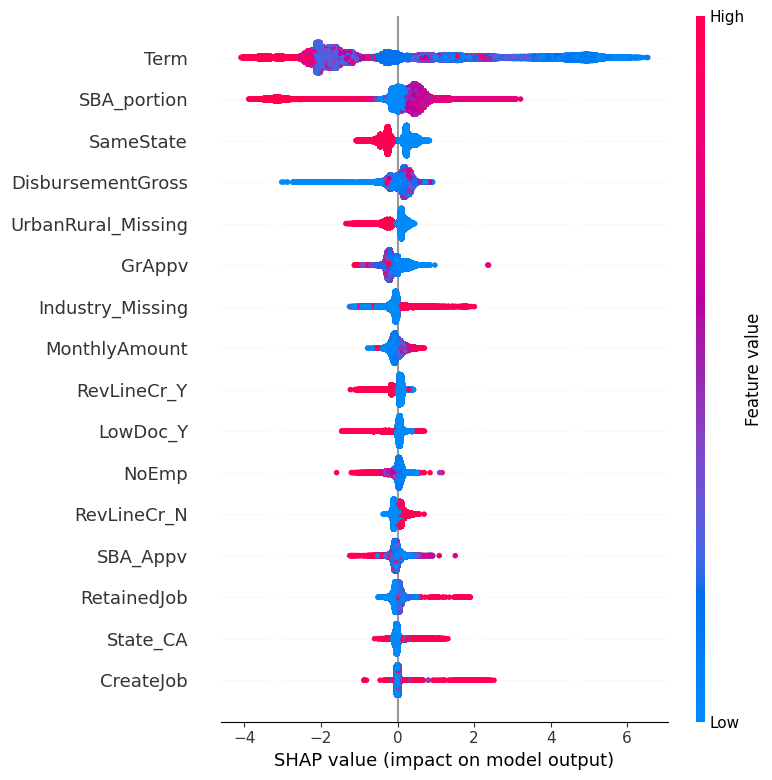

In [51]:
# Create shap summary plot for test data
shap.summary_plot(shap_values=shap_contribs.values,
                  features=ftr_values)

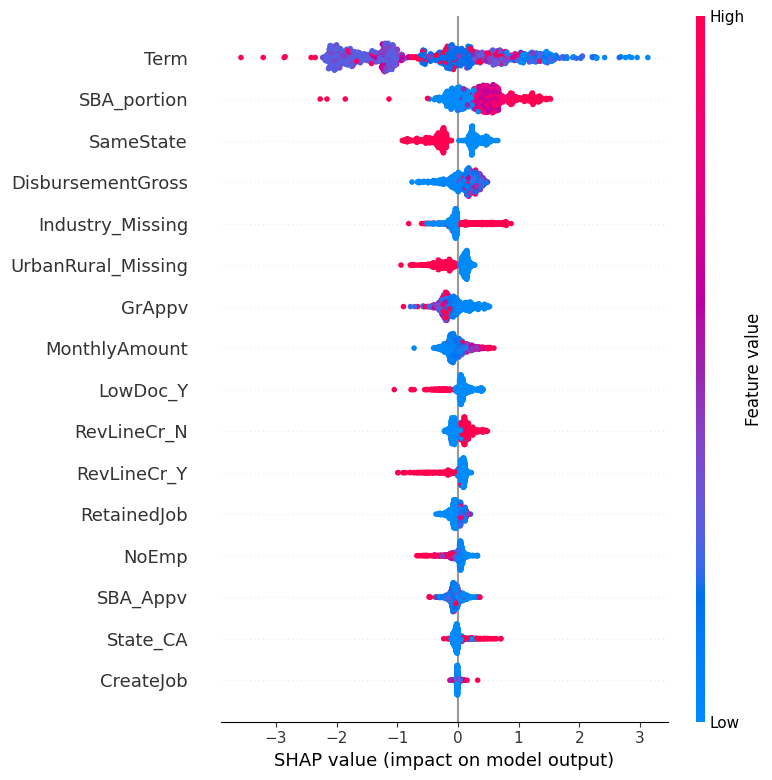

In [54]:
# Create shap summary plot for top 1000 observations (class 1 predicted as 0)
shap.summary_plot(shap_values=shap_contribs.values[0:1000],
                  features=ftr_values[0:1000])

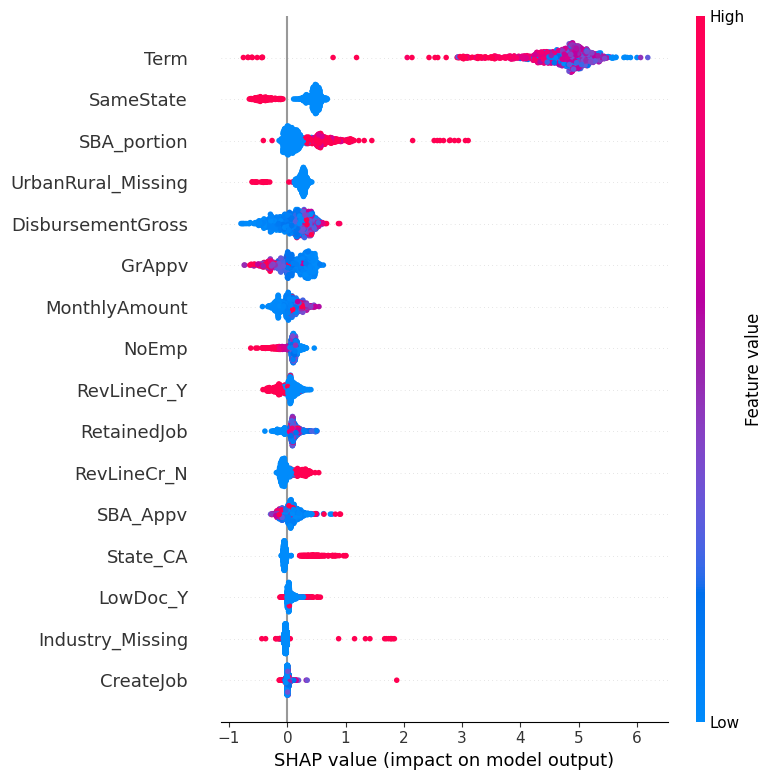

In [55]:
# Create shap summary plot for bottom 1000 observations (class 0 predicted as 1)
shap.summary_plot(shap_values=shap_contribs.values[-1000:],
                  features=ftr_values[-1000:], title = 'False Positives')

In [235]:
import statsmodels.api as sm

# Fit the GLM with a logistic link function
glm_logistic = sm.GLM(test_yhat[label], test_yhat[shortlisted_features], family=sm.families.Binomial(link=sm.families.links.logit())).fit()

# Print the summary of the model
print(glm_logistic.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             MIS_Status   No. Observations:               161485
Model:                            GLM   Df Residuals:                   161469
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -57422.
Date:                Mon, 08 May 2023   Deviance:                   1.1483e+05
Time:                        00:43:33   Pearson chi2:                 9.01e+15
No. Iterations:                     8   Pseudo R-squ. (CS):             0.1955
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
NoEmp                 -0.0046      0

## Deep Sequential Classifier

In [176]:
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import Model

In [184]:
# Scale numerical columns
x_train, x_test = deepcopy(train_x), deepcopy(test_x)
scalers = []
for col in tqdm(['Term', 'NoEmp', 'CreateJob', 'RetainedJob', 'DisbursementGross', 'GrAppv', 'SBA_Appv', 'MonthlyAmount']):
  scaler = MinMaxScaler()
  x_train[col] = scaler.fit_transform(x_train[[col]])
  x_test[col] = scaler.transform(x_test[[col]])
  scalers.append(scaler)

100%|██████████| 8/8 [00:23<00:00,  2.98s/it]


In [204]:
input = Input(shape = (x_train[select_features].shape[1],))
x = Dense(128, activation = 'relu')(input)
x = Dense(128, activation = 'relu')(x)
x = Dense(64, activation = 'relu')(x)
output = Dense(1, activation = 'sigmoid')(x)

model = Model(input, output)
model.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 124)]             0         
                                                                 
 dense_46 (Dense)            (None, 128)               16000     
                                                                 
 dense_47 (Dense)            (None, 128)               16512     
                                                                 
 dense_48 (Dense)            (None, 64)                8256      
                                                                 
 dense_49 (Dense)            (None, 1)                 65        
                                                                 
Total params: 40,833
Trainable params: 40,833
Non-trainable params: 0
_________________________________________________________________


In [205]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['AUC'])
model.fit(x = x_train[select_features], y = train_y,
          validation_data = (x_test[select_features], test_y),
          batch_size = 128,
          epochs = 10)

Epoch 1/10
5047/5047 [==============================] - 89s 17ms/step - loss: 0.2974 - auc: 0.8809 - val_loss: 0.2700 - val_auc: 0.9063
Epoch 2/10
5047/5047 [==============================] - 80s 16ms/step - loss: 0.2655 - auc: 0.9084 - val_loss: 0.2667 - val_auc: 0.9094
Epoch 3/10
5047/5047 [==============================] - 82s 16ms/step - loss: 0.2556 - auc: 0.9158 - val_loss: 0.2530 - val_auc: 0.9175
Epoch 4/10
5047/5047 [==============================] - 80s 16ms/step - loss: 0.2484 - auc: 0.9211 - val_loss: 0.2503 - val_auc: 0.9219
Epoch 5/10
5047/5047 [==============================] - 82s 16ms/step - loss: 0.2417 - auc: 0.9258 - val_loss: 0.2423 - val_auc: 0.9256
Epoch 6/10
5047/5047 [==============================] - 82s 16ms/step - loss: 0.2353 - auc: 0.9303 - val_loss: 0.2365 - val_auc: 0.9297
Epoch 7/10
5047/5047 [==============================] - 80s 16ms/step - loss: 0.2301 - auc: 0.9338 - val_loss: 0.2404 - val_auc: 0.9273
Epoch 8/10
5047/5047 [==========================

In [216]:
# Evaluate the model
preds = model.predict(x_test[select_features])
print(classification_report(test_y, (preds>0.5).astype('int')))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95    133157
           1       0.81      0.65      0.72     28328

    accuracy                           0.91    161485
   macro avg       0.87      0.81      0.83    161485
weighted avg       0.91      0.91      0.91    161485



## Scoring Function

In [397]:
# Ger a subset of raw data
new_data = pd.read_csv('/content/sba_loans.zip')[:20000]

In [398]:
def scoring_function(new_data):

  # Features and Labels
  features = ['NoEmp','Industry_Missing', 'MonthlyAmount', 'UrbanRural_Missing',
              'RevLineCr_N', 'State_CA', 'RetainedJob', 'RevLineCr_Y',
              'SBA_portion', 'GrAppv',   'SameState',  'LowDoc_Y',
              'CreateJob', 'Term', 'SBA_Appv', 'DisbursementGross']
  label = 'MIS_Status'

  # Load artifacts
  print('Starting to load artifacts...')
  model = joblib.load('model.joblib')
  clean_data = joblib.load('clean_function.joblib')
  industry_map = joblib.load('industry_map.joblib')

  # Clean Data
  print('Starting data cleaning...')
  cleaned_data = clean_data(new_data)

  # Preprocess Data
  print('Starting to transfrom data')
  cleaned_data['Industry'] = cleaned_data['NAICS'].apply(lambda x: industry_map.get(x[:2], 'Missing'))
  cleaned_data['Industry_Missing'] = (cleaned_data['Industry']=='Missing').astype('int')
  cleaned_data['MonthlyAmount'] = cleaned_data['GrAppv']/(cleaned_data['Term']+(cleaned_data['Term']==0).astype('int'))
  cleaned_data['UrbanRural_Missing'] = (cleaned_data['UrbanRural']=='Missing').astype('int')
  cleaned_data['RevLineCr_Y'] =  (cleaned_data['RevLineCr']=='Y').astype('int')
  cleaned_data['RevLineCr_N'] =  (cleaned_data['RevLineCr']=='N').astype('int')
  cleaned_data['SameState'] = (cleaned_data['BankState'] == cleaned_data['State']).astype('int')
  cleaned_data['SBA_portion'] = cleaned_data['SBA_Appv']/cleaned_data['GrAppv']
  cleaned_data['State_CA'] = (cleaned_data['State'] == 'CA').astype('int')
  cleaned_data['LowDoc_Y'] =  (cleaned_data['LowDoc']=='Y').astype('int')

  # Calculate Default Probability  
  print('Predicting default or not...')         
  predictions = model.predict_proba(cleaned_data[features])[:,1]
  print('Finished successfully.')

  return predictions

In [399]:
# Use scoring function to get predictions
predictions = scoring_function(new_data)

Starting to load artifacts...
Starting data cleaning...
Starting to transfrom data
Predicting default or not...
Finished successfully.


In [400]:
# Evaluate predictions
auc_score = roc_auc_score(new_data[label], predictions)
print(f'AUC = {auc_score}')

AUC = 0.9736958016443626
